In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('mnist_train.csv', header=None)
labels = train.iloc[1:10000, 0]
images = train.iloc[1:10000, 1:]

test = pd.read_csv('mnist_train.csv', header=None)
test_labels = test.iloc[:, 0]
test_images = test.iloc[:, 1:]

#convert from python list into numpy array i.e. 60k to 1 array with each column a 28x28 matrix
#label = label.astype(np.uint8)
#images = np.array(images).reshape((-1, 1, 28, 28)).astype(np.uint8)

## PCA

In [3]:
from sklearn.decomposition import PCA

COMPONENT_NUM = 200
pca = PCA(n_components=COMPONENT_NUM, whiten=True)
pca.fit(images)
imagesPCA = pca.transform(images)


array([ 0.10200956,  0.17416747,  0.23528078,  0.28943416,  0.33719989,
        0.38133747,  0.41416718,  0.44344131,  0.47128721,  0.4943616 ,
        0.51565863,  0.53620102,  0.55307212,  0.56987625,  0.58604374,
        0.60143073,  0.61430599,  0.62694405,  0.63853103,  0.64980938,
        0.6601494 ,  0.67022776,  0.67967143,  0.68890606,  0.6974559 ,
        0.70588727,  0.71392231,  0.72167864,  0.72888255,  0.73573706,
        0.74226852,  0.74856333,  0.75451338,  0.76039122,  0.76591175,
        0.7712053 ,  0.77633961,  0.7811373 ,  0.78589229,  0.79056647,
        0.79505849,  0.79924701,  0.80336196,  0.80737461,  0.81111415,
        0.81474637,  0.81825234,  0.82171358,  0.82500515,  0.82826717,
        0.83146935,  0.83462904,  0.83758441,  0.84044223,  0.84324461,
        0.84594837,  0.84858997,  0.85111115,  0.85359769,  0.85603743,
        0.85841495,  0.86074337,  0.86298018,  0.86517943,  0.86728367,
        0.86932659,  0.87134553,  0.87329561,  0.87521949,  0.87

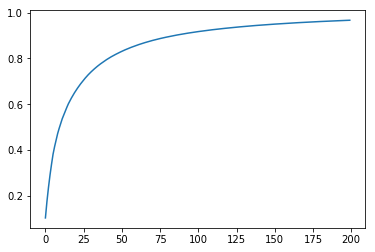

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

var_explained = pca.explained_variance_ratio_.cumsum()
plt.plot(var_explained)
var_explained

In [5]:
imagesPCA.shape

(9999, 200)

In [6]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(imagesPCA, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
test_imagesPCA = pca.transform(test_images)
test_predict = svc.predict(test_imagesPCA)

In [8]:
test_predict.shape

(60000,)

In [9]:
from sklearn import  metrics
from sklearn.metrics import accuracy_score
#accuracy and confusion matrix

print("Classification report for classifier %s:\n%s\n"
      % (svc, metrics.classification_report(test_labels, test_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, test_predict))

accuracy_score(test_labels, test_predict)

0.9513166666666667